In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load csv

In [3]:
temp = pd.read_csv("temperature_change_data_11-29-2021.csv")

In [4]:
# load first 5 lines from the table

In [5]:
temp.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1961,1961,°C,-0.751,Fc,Calculated data
1,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1962,1962,°C,0.985,Fc,Calculated data
2,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1963,1963,°C,1.931,Fc,Calculated data
3,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1964,1964,°C,-2.056,Fc,Calculated data
4,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1965,1965,°C,-0.669,Fc,Calculated data


In [6]:
# basic statistical details

In [7]:
temp.describe()

,Element Code,Months Code,Year Code,Year,Value
count,67625.0,67625.000000,67625.000000,67625.000000,65331.000000
mean,7271.0,7018.000000,1991.306248,1991.306248,0.491524
std,0.0,1.414224,17.333343,17.333343,0.820116
min,7271.0,7016.000000,1961.000000,1961.000000,-5.979000
25%,7271.0,7017.000000,1976.000000,1976.000000,-0.011000
50%,7271.0,7018.000000,1992.000000,1992.000000,0.410000
75%,7271.0,7019.000000,2006.000000,2006.000000,0.932000
max,7271.0,7020.000000,2020.000000,2020.000000,8.206000


In [8]:
# show only relevenat data

In [9]:
temp["Value"].describe()

count    65331.000000
mean         0.491524
std          0.820116
min         -5.979000
25%         -0.011000
50%          0.410000
75%          0.932000
max          8.206000
Name: Value, dtype: float64

In [10]:
# count country unique values

In [11]:
temp["Area"].value_counts()

Afghanistan              300
Norfolk Island           300
Namibia                  300
Nauru                    300
Nepal                    300
                        ... 
Montenegro                75
Serbia                    75
Serbia and Montenegro     70
Sudan                     50
South Sudan               50
Name: Area, Length: 247, dtype: int64

In [12]:
#countries to keep

In [13]:
areas_to_keep = ["China","Germany","Japan","United States of America"]

In [14]:
#filter the data

In [15]:
evolution = temp[(temp["Flag Description"] != "Data Not Available") &
                (temp["Months"] == "Meteorological year") & 
                (temp["Area"].isin(areas_to_keep))].reset_index(drop=True)

In [16]:
# rename some Areas

In [17]:
evolution["Area"] = evolution["Area"].replace(to_replace=["United States of America"], 
                                              value=["United States"])

In [18]:
# group by area and year

In [19]:
evolution = evolution.groupby(["Area", "Year"])["Value"].mean().reset_index()

In [20]:
#look into the dataframe

In [21]:
evolution.head()

,Area,Year,Value
0,China,1961,0.266
1,China,1962,-0.134
2,China,1963,0.292
3,China,1964,-0.020
4,China,1965,0.081


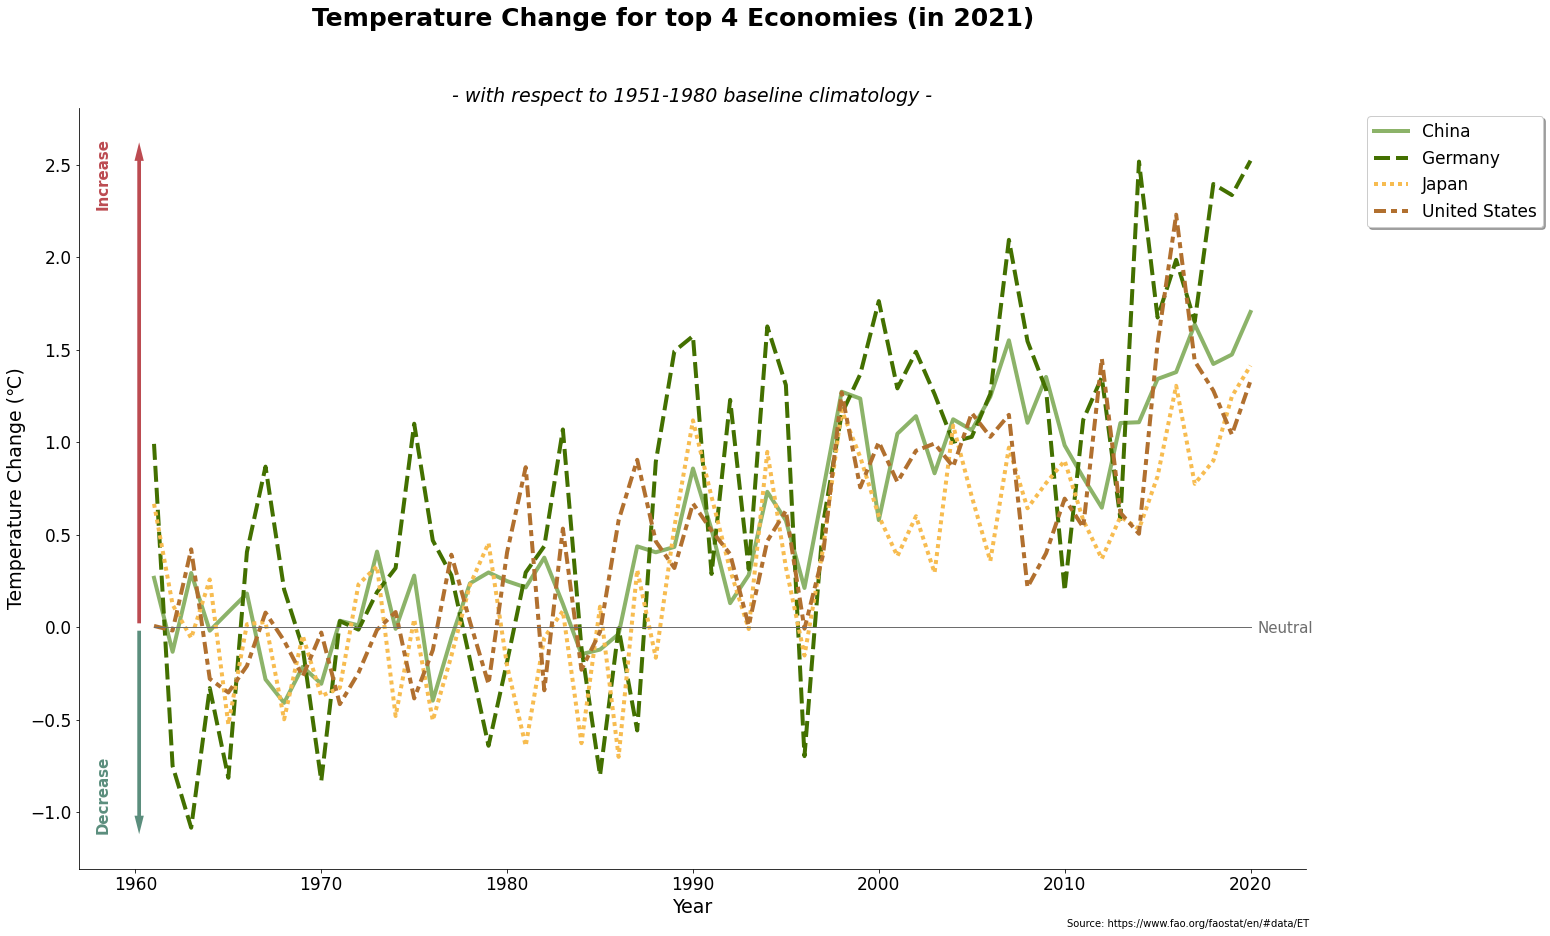

In [22]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=evolution, x="Year", y="Value",
                    hue="Area", style="Area", lw=4,
                    palette=["#8CB369", "#437000", "#F7BC50", "#B1702F"])

# Add a general title
plt.suptitle("Temperature Change for top 4 Economies (in 2021)", fontsize=25, weight="bold")
plt.title("- with respect to 1951-1980 baseline climatology -", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("Temperature Change (℃)", fontsize=19)

# Format axis ticks
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Add a legend
leg = line.legend(fontsize=17, bbox_to_anchor= (1.2,1), shadow=1)
for legend_line in leg.get_lines():
    legend_line.set_linewidth(4)
    

# Despinde for better readability
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)

# Add arrows for better visualization
plt.arrow(x=1960.2, y=0.02, dx=0, dy=2.5, width=0.2, head_width=0.5, head_length=0.1,
          facecolor='#BC4B51', edgecolor='none')
plt.arrow(x=1960.2, y=-0.02, dx=0, dy=-1, width=0.2, head_width=0.5, head_length=0.1,
          facecolor='#5B8E7D', edgecolor='none')
plt.plot([1961, 2020], [0.0, 0.0], lw=1, color="#6D6D6D")

# Add text helpers
plt.text(0.014, 0.87, 'Increase', fontsize=15, color='#BC4B51', weight="bold",
         rotation="vertical", transform=line.transAxes)
plt.text(0.014, 0.05, 'Decrease', fontsize=15, color='#5B8E7D', weight="bold",
         rotation="vertical", transform=line.transAxes)
plt.text(0.96, 0.31, 'Neutral', fontsize=15, color='#6D6D6D',
         rotation="horizontal", transform=line.transAxes)

# Add source of data
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0.87,0), (-80,-50), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top');

In [23]:
# group by maximum

In [24]:
evolution_max = temp[(temp["Flag Description"] != "Data Not Available") &
                (temp["Months"] == "Meteorological year") & 
                (temp["Value"] >= 3.5)].reset_index(drop=True)

evolution_max = evolution_max.groupby(["Area", "Year"])["Value"].mean().reset_index()

In [25]:
#look into the dataframe

In [26]:
evolution_max.head()

,Area,Year,Value
0,Belarus,2020,3.518
1,Estonia,2020,3.596
2,Latvia,2020,3.513
3,Russian Federation,2020,3.699
4,Svalbard and Jan Mayen Islands,2006,3.885


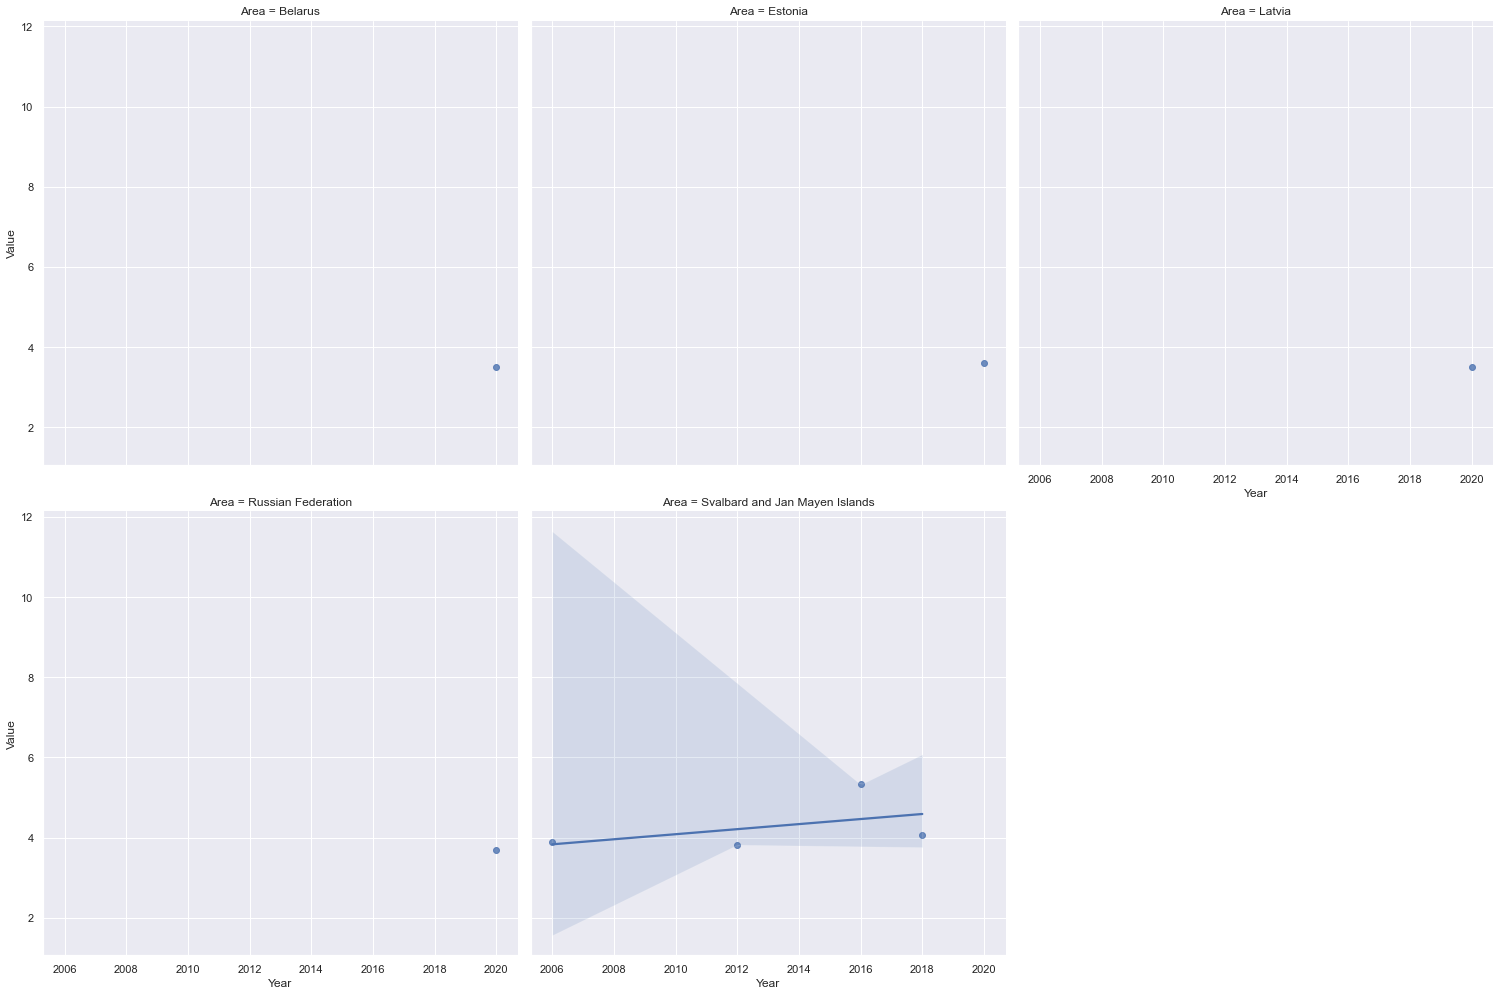

In [27]:
# Plot the initial linechart
sns.set_theme(style="darkgrid")

lmplot = sns.lmplot(data=evolution_max, x="Year", y="Value",col="Area",col_wrap=3, height=7)

In [28]:
evolution_min = temp[(temp["Flag Description"] != "Data Not Available") &
                (temp["Months"] == "Meteorological year") & 
                (temp["Value"] < -2)].reset_index(drop=True)

evolution_min = evolution_min.groupby(["Area", "Year"])["Value"].mean().reset_index()

In [29]:
evolution_min.head()

,Area,Year,Value
0,Greenland,1983,-2.076
1,Svalbard and Jan Mayen Islands,1963,-2.245
2,Svalbard and Jan Mayen Islands,1966,-2.357
3,Svalbard and Jan Mayen Islands,1968,-3.251
4,Svalbard and Jan Mayen Islands,1988,-2.107


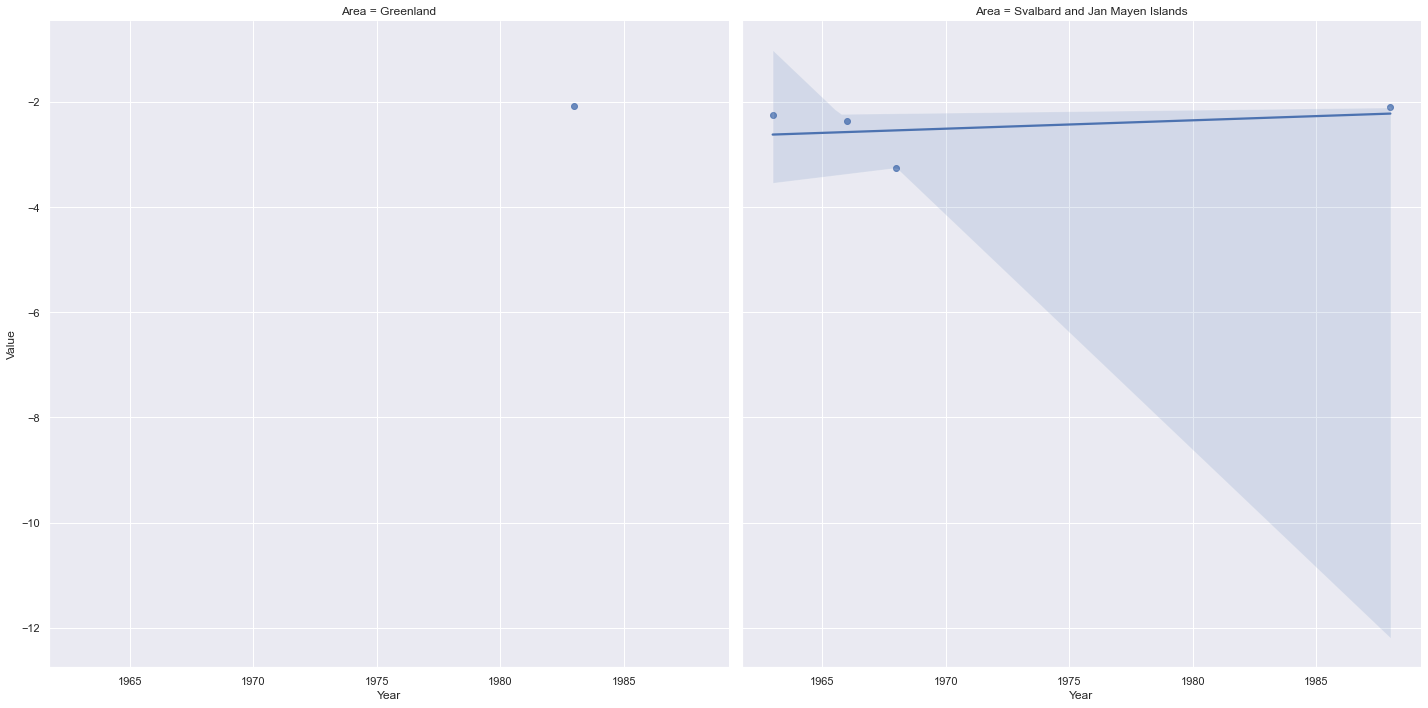

In [30]:
# Plot the initial linechart
sns.set_theme(style="darkgrid")

lmplot = sns.lmplot(data=evolution_min, x="Year", y="Value",col="Area",col_wrap=2, height=10)

In [31]:
areas_to_keep2 = ["Svalbard and Jan Mayen Islands"]

In [32]:
evolution2 = temp[(temp["Flag Description"] != "Data Not Available") &
                (temp["Months"] == "Meteorological year") & 
                (temp["Area"].isin(areas_to_keep2))].reset_index(drop=True)

In [33]:
evolution2 = evolution2.groupby(["Area", "Year"])["Value"].mean().reset_index()

In [34]:
evolution2.head()

,Area,Year,Value
0,Svalbard and Jan Mayen Islands,1961,0.565
1,Svalbard and Jan Mayen Islands,1962,-1.364
2,Svalbard and Jan Mayen Islands,1963,-2.245
3,Svalbard and Jan Mayen Islands,1964,-0.504
4,Svalbard and Jan Mayen Islands,1965,-0.160


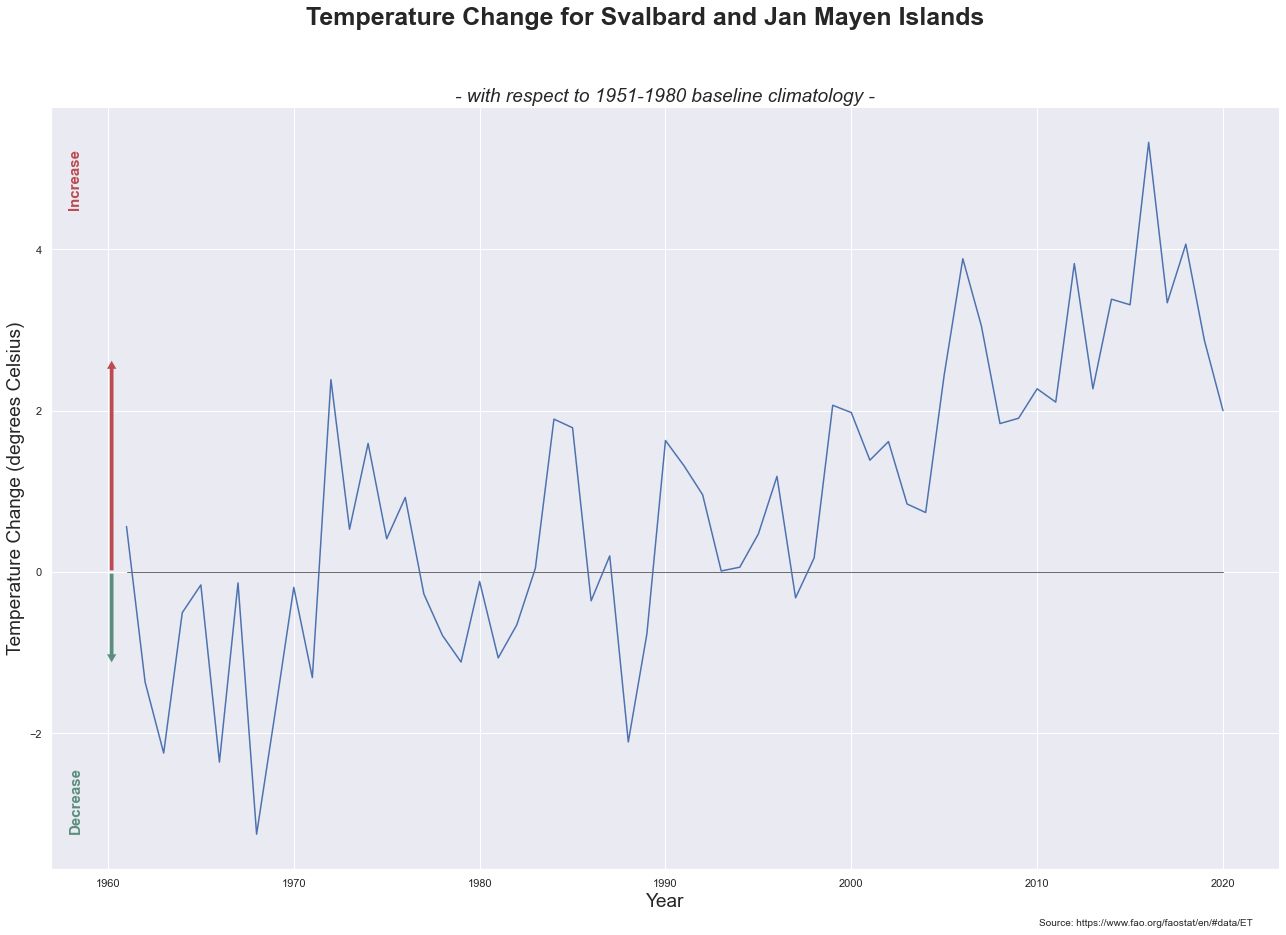

In [35]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=evolution2, x="Year", y="Value")

# Add a general title
plt.suptitle("Temperature Change for Svalbard and Jan Mayen Islands", fontsize=25, weight="bold")
plt.title("- with respect to 1951-1980 baseline climatology -", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("Temperature Change (degrees Celsius)", fontsize=19)

# Despinde for better readability
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)

# Add arrows for better visualization
plt.arrow(x=1960.2, y=0.02, dx=0, dy=2.5, width=0.2, head_width=0.5, head_length=0.1,
          facecolor='#BC4B51', edgecolor='none')
plt.arrow(x=1960.2, y=-0.02, dx=0, dy=-1, width=0.2, head_width=0.5, head_length=0.1,
          facecolor='#5B8E7D', edgecolor='none')
plt.plot([1961, 2020], [0.0, 0.0], lw=1, color="#6D6D6D")

# Add text helpers
plt.text(0.014, 0.87, 'Increase', fontsize=15, color='#BC4B51', weight="bold",
         rotation="vertical", transform=line.transAxes)
plt.text(0.014, 0.05, 'Decrease', fontsize=15, color='#5B8E7D', weight="bold",
         rotation="vertical", transform=line.transAxes)

# Add source of data
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0.87,0), (-80,-50), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top');

Text(0, 0.5, 'Temperature Change (degrees Celsius)')

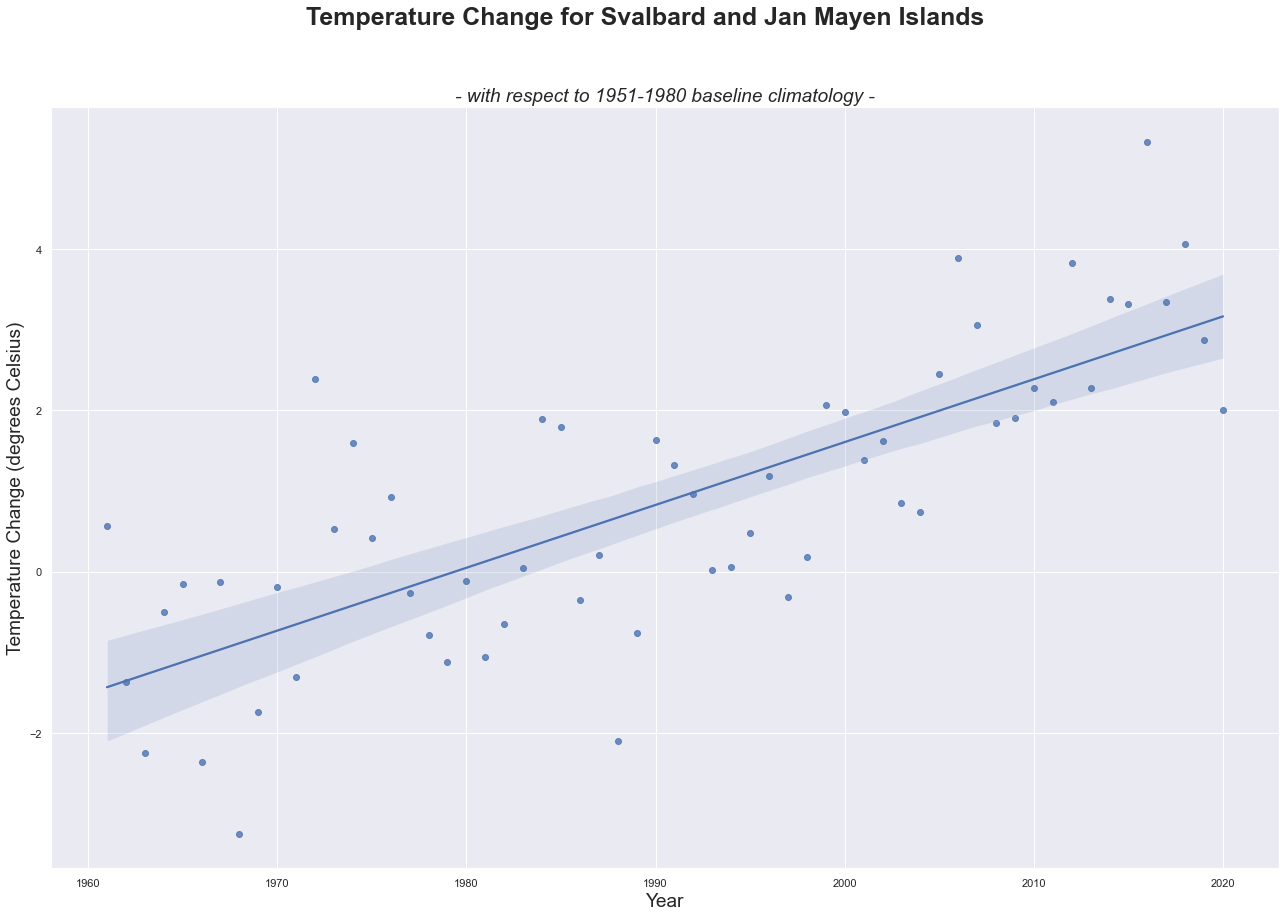

In [36]:
# Set the general figure size
plt.figure(figsize=(22, 14))

regplot = sns.regplot(data=evolution2, x="Year", y="Value")

# Add a general title
plt.suptitle("Temperature Change for Svalbard and Jan Mayen Islands", fontsize=25, weight="bold")
plt.title("- with respect to 1951-1980 baseline climatology -", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("Temperature Change (degrees Celsius)", fontsize=19)

In [37]:
# Seasonal temperature change


In [38]:
# Winter

In [39]:
evolution_winter = temp[(temp["Flag Description"] != "Data Not Available") &
                (temp["Months"] == "Dec–Jan–Feb")].reset_index(drop=True)

In [40]:
evolution_winter = evolution_winter.groupby(["Area", "Year"])["Value"].mean().reset_index()

In [41]:
evolution_winter.head()

,Area,Year,Value
0,Afghanistan,1961,-0.751
1,Afghanistan,1962,0.985
2,Afghanistan,1963,1.931
3,Afghanistan,1964,-2.056
4,Afghanistan,1965,-0.669


Text(0, 0.5, 'Temperature Change (degrees Celsius)')

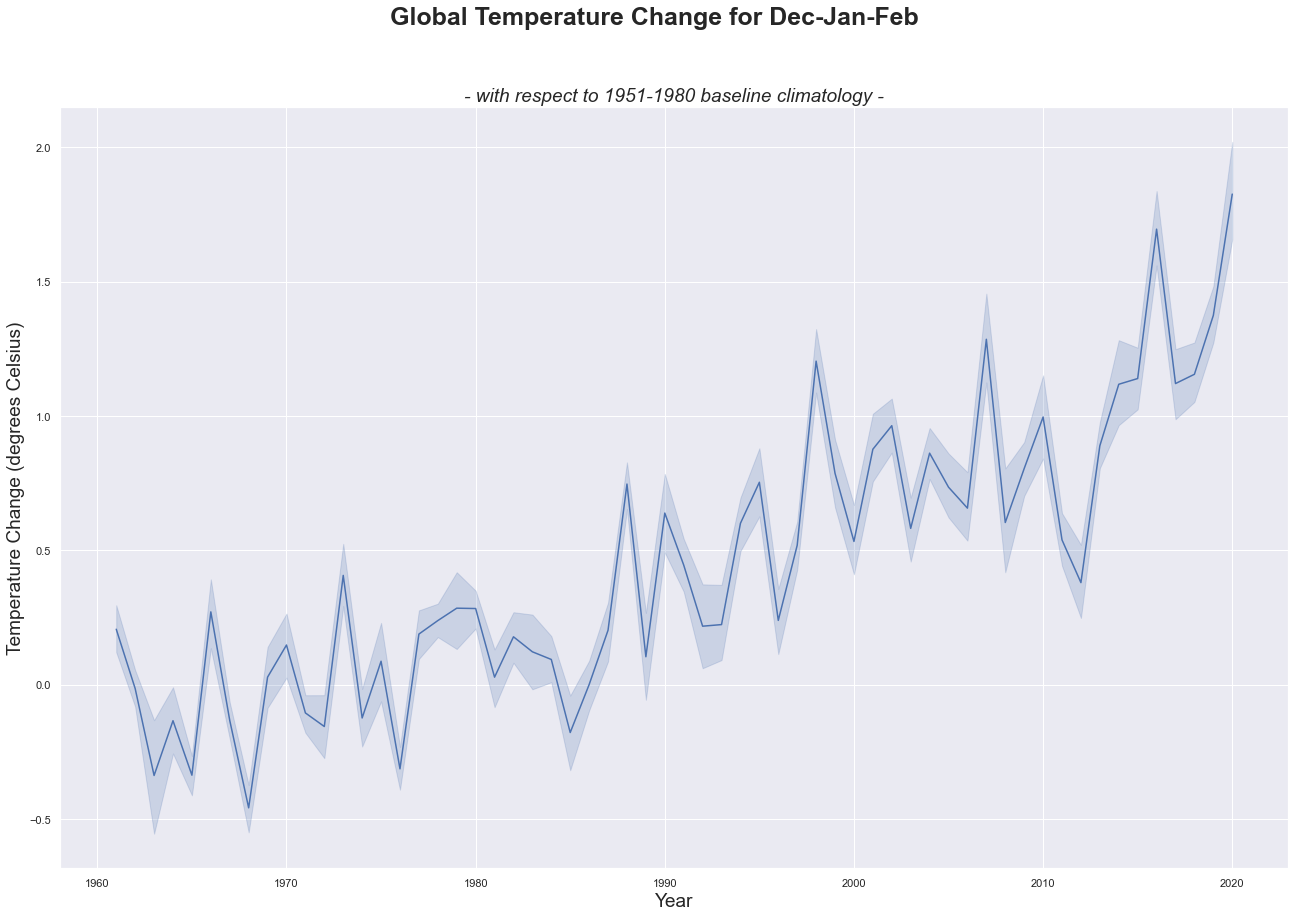

In [42]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=evolution_winter, x="Year", y="Value")

# Add a general title
plt.suptitle("Global Temperature Change for Dec-Jan-Feb", fontsize=25, weight="bold")
plt.title("- with respect to 1951-1980 baseline climatology -", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("Temperature Change (degrees Celsius)", fontsize=19)

In [43]:
# Spring

In [44]:
evolution_spring = temp[(temp["Flag Description"] != "Data Not Available") &
                (temp["Months"] == "Mar–Apr–May")].reset_index(drop=True)
evolution_spring = evolution_spring.groupby(["Area", "Year"])["Value"].mean().reset_index()

In [45]:
evolution_spring.head()

,Area,Year,Value
0,Afghanistan,1961,0.022
1,Afghanistan,1962,0.400
2,Afghanistan,1963,0.173
3,Afghanistan,1964,0.274
4,Afghanistan,1965,-1.016


Text(0, 0.5, 'Temperature Change (degrees Celsius)')

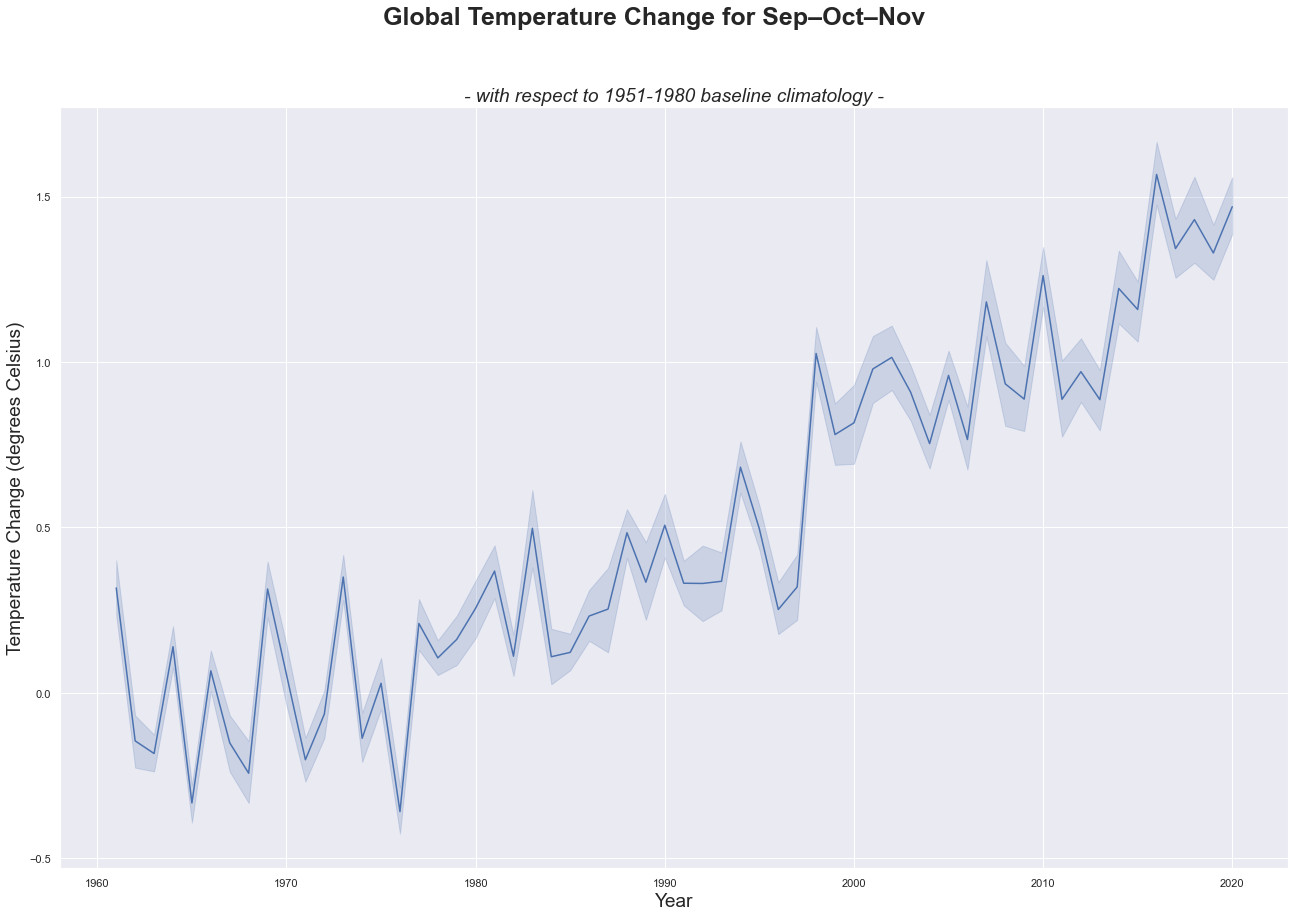

In [46]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=evolution_spring, x="Year", y="Value")

# Add a general title
plt.suptitle("Global Temperature Change for Sep–Oct–Nov", fontsize=25, weight="bold")
plt.title("- with respect to 1951-1980 baseline climatology -", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("Temperature Change (degrees Celsius)", fontsize=19)

In [47]:
# Autumn

In [48]:
evolution_autumn = temp[(temp["Flag Description"] != "Data Not Available") &
                (temp["Months"] == "Sep–Oct–Nov")].reset_index(drop=True)
evolution_autumn = evolution_autumn.groupby(["Area", "Year"])["Value"].mean().reset_index()

In [49]:
evolution_autumn.head()

,Area,Year,Value
0,Afghanistan,1961,-0.100
1,Afghanistan,1962,-1.682
2,Afghanistan,1963,0.766
3,Afghanistan,1964,-1.281
4,Afghanistan,1965,1.070


Text(0, 0.5, 'Temperature Change (degrees Celsius)')

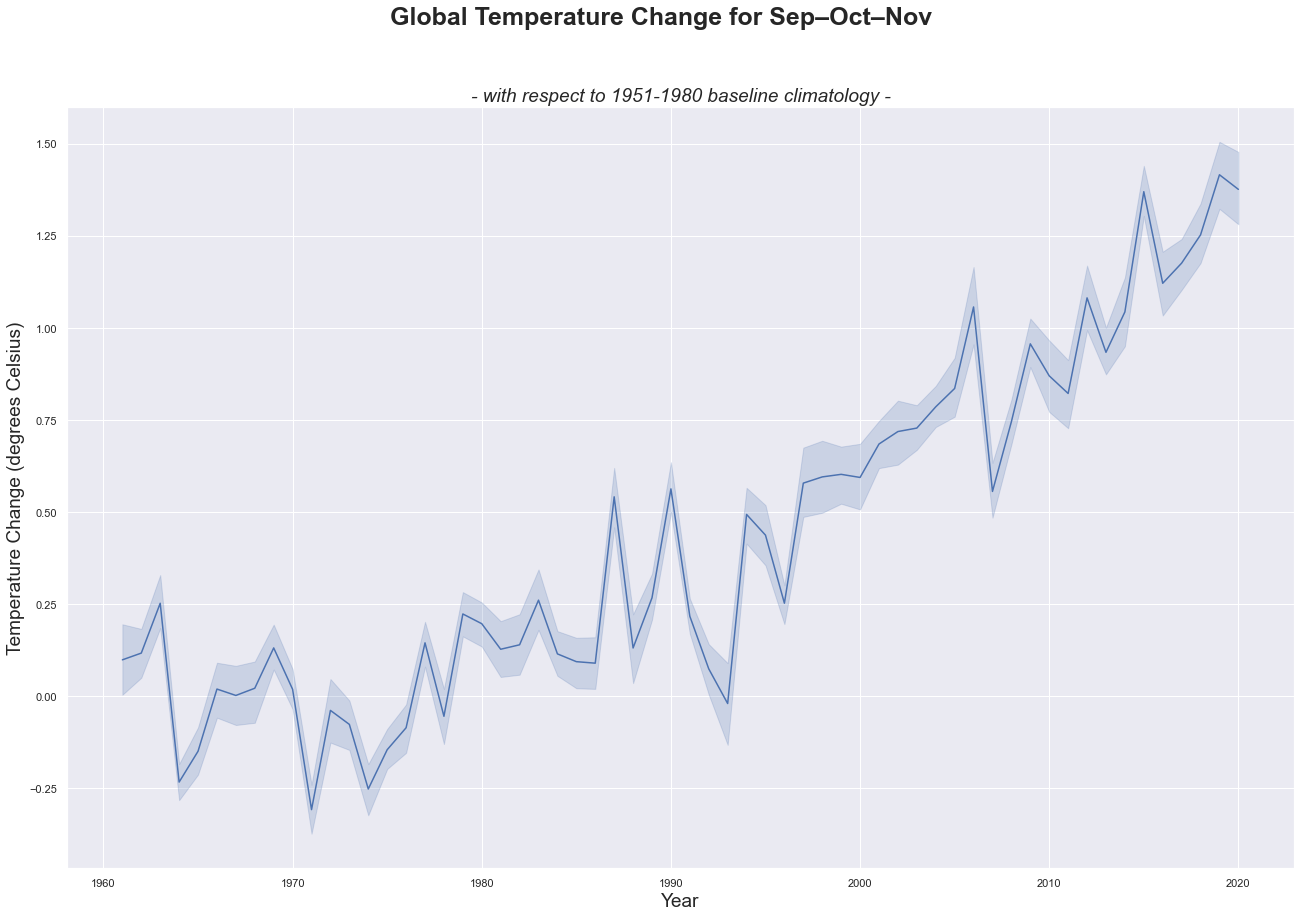

In [50]:
# Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=evolution_autumn, x="Year", y="Value")

# Add a general title
plt.suptitle("Global Temperature Change for Sep–Oct–Nov", fontsize=25, weight="bold")
plt.title("- with respect to 1951-1980 baseline climatology -", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("Temperature Change (degrees Celsius)", fontsize=19)

In [51]:
# South America

In [52]:
areas_to_keep3 = ["Argentina","Brazil","Columbia","Peru","Bolivia","Chile","Paraguay","Uruguay","Venezuela"]

In [53]:
evolution_south_america = temp[(temp["Flag Description"] != "Data Not Available") &
                (temp["Months"] == "Meteorological year") & 
                (temp["Area"].isin(areas_to_keep3))].reset_index(drop=True)

In [54]:
evolution_south_america = evolution_south_america.groupby(["Area", "Year"])["Value"].mean().reset_index()

In [55]:
evolution_south_america.head()

,Area,Year,Value
0,Argentina,1961,0.149
1,Argentina,1962,-0.049
2,Argentina,1963,0.169
3,Argentina,1964,-0.343
4,Argentina,1965,0.088


Text(0, 0.5, 'Temperature Change (degrees Celsius)')

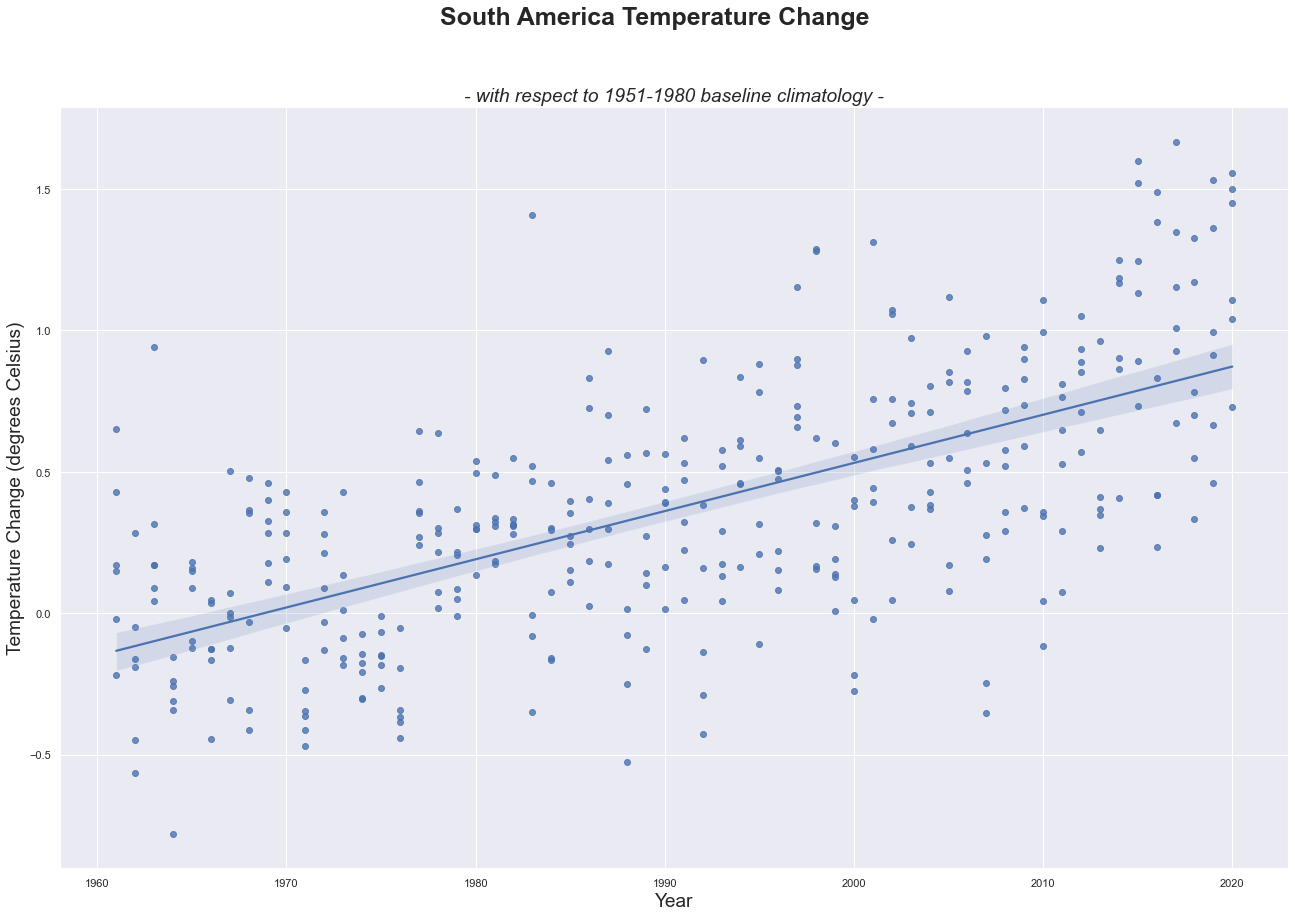

In [56]:
#Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.regplot(data=evolution_south_america, x="Year", y="Value")

# Add a general title
plt.suptitle("South America Temperature Change", fontsize=25, weight="bold")
plt.title("- with respect to 1951-1980 baseline climatology -", fontsize=19, style="italic")

# Format axis labels
plt.xlabel("Year", fontsize=19)
plt.ylabel("Temperature Change (degrees Celsius)", fontsize=19)

In [57]:
evolution_south_america_winter = temp[(temp["Flag Description"] != "Data Not Available") &
                (temp["Months"] == "Dec–Jan–Feb") & 
                (temp["Area"].isin(areas_to_keep3))].reset_index(drop=True)
evolution_south_america_winter = evolution_south_america_winter.groupby(["Area", "Year"])["Value"].mean().reset_index()
evolution_south_america_winter.head()

,Area,Year,Value
0,Argentina,1961,0.035
1,Argentina,1962,-0.144
2,Argentina,1963,0.552
3,Argentina,1964,0.052
4,Argentina,1965,-0.034


<Figure size 1584x1008 with 0 Axes>

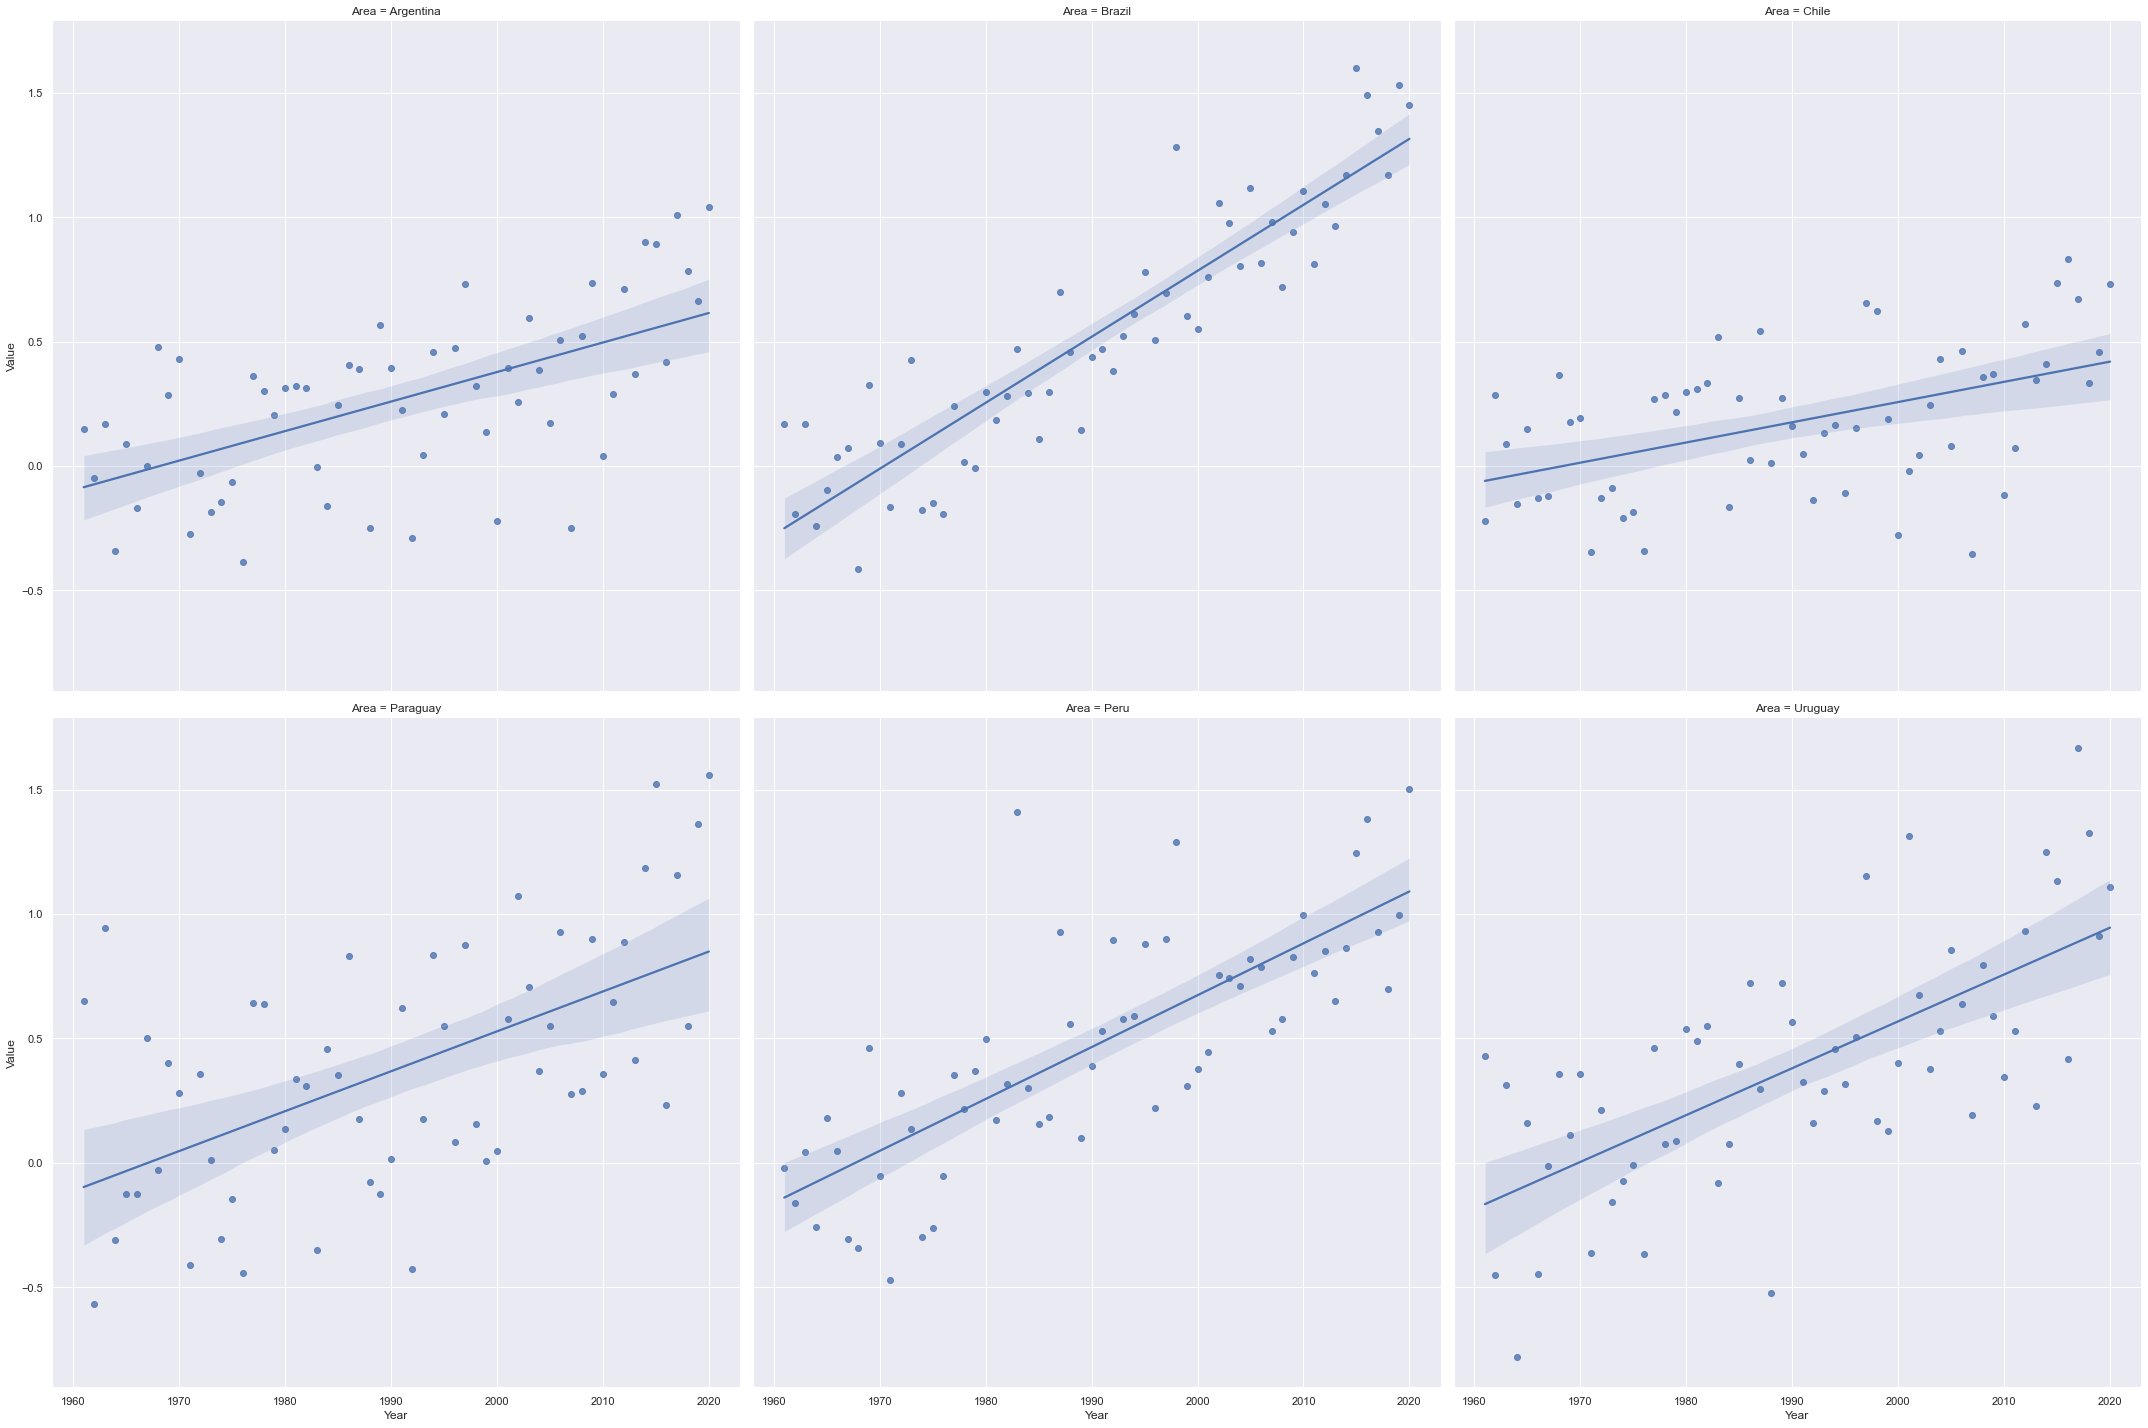

In [58]:
#Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lmplot(data=evolution_south_america, x="Year", y="Value",col="Area",col_wrap=3, height=10)

<Figure size 1584x1008 with 0 Axes>

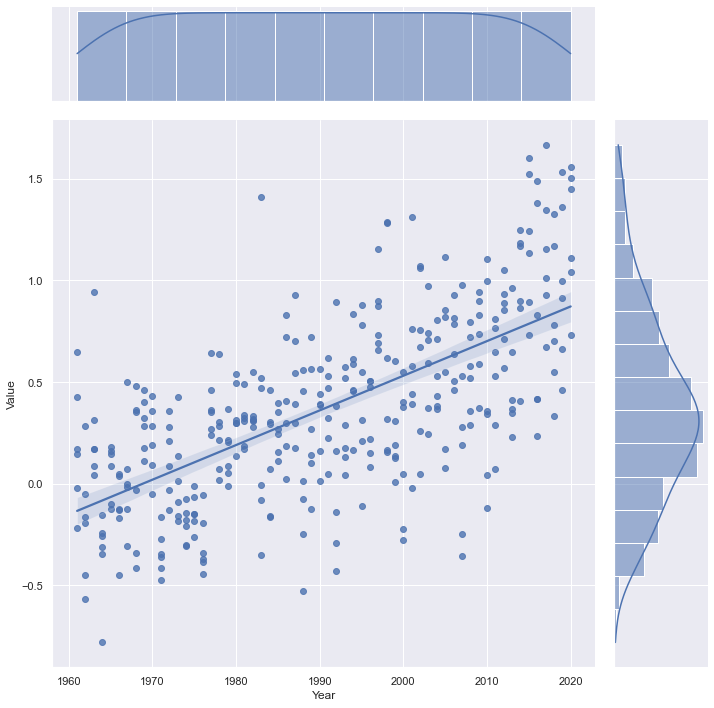

In [59]:
#Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.jointplot(data=evolution_south_america, x="Year", y="Value",height=10,kind="reg")

<Figure size 1584x1008 with 0 Axes>

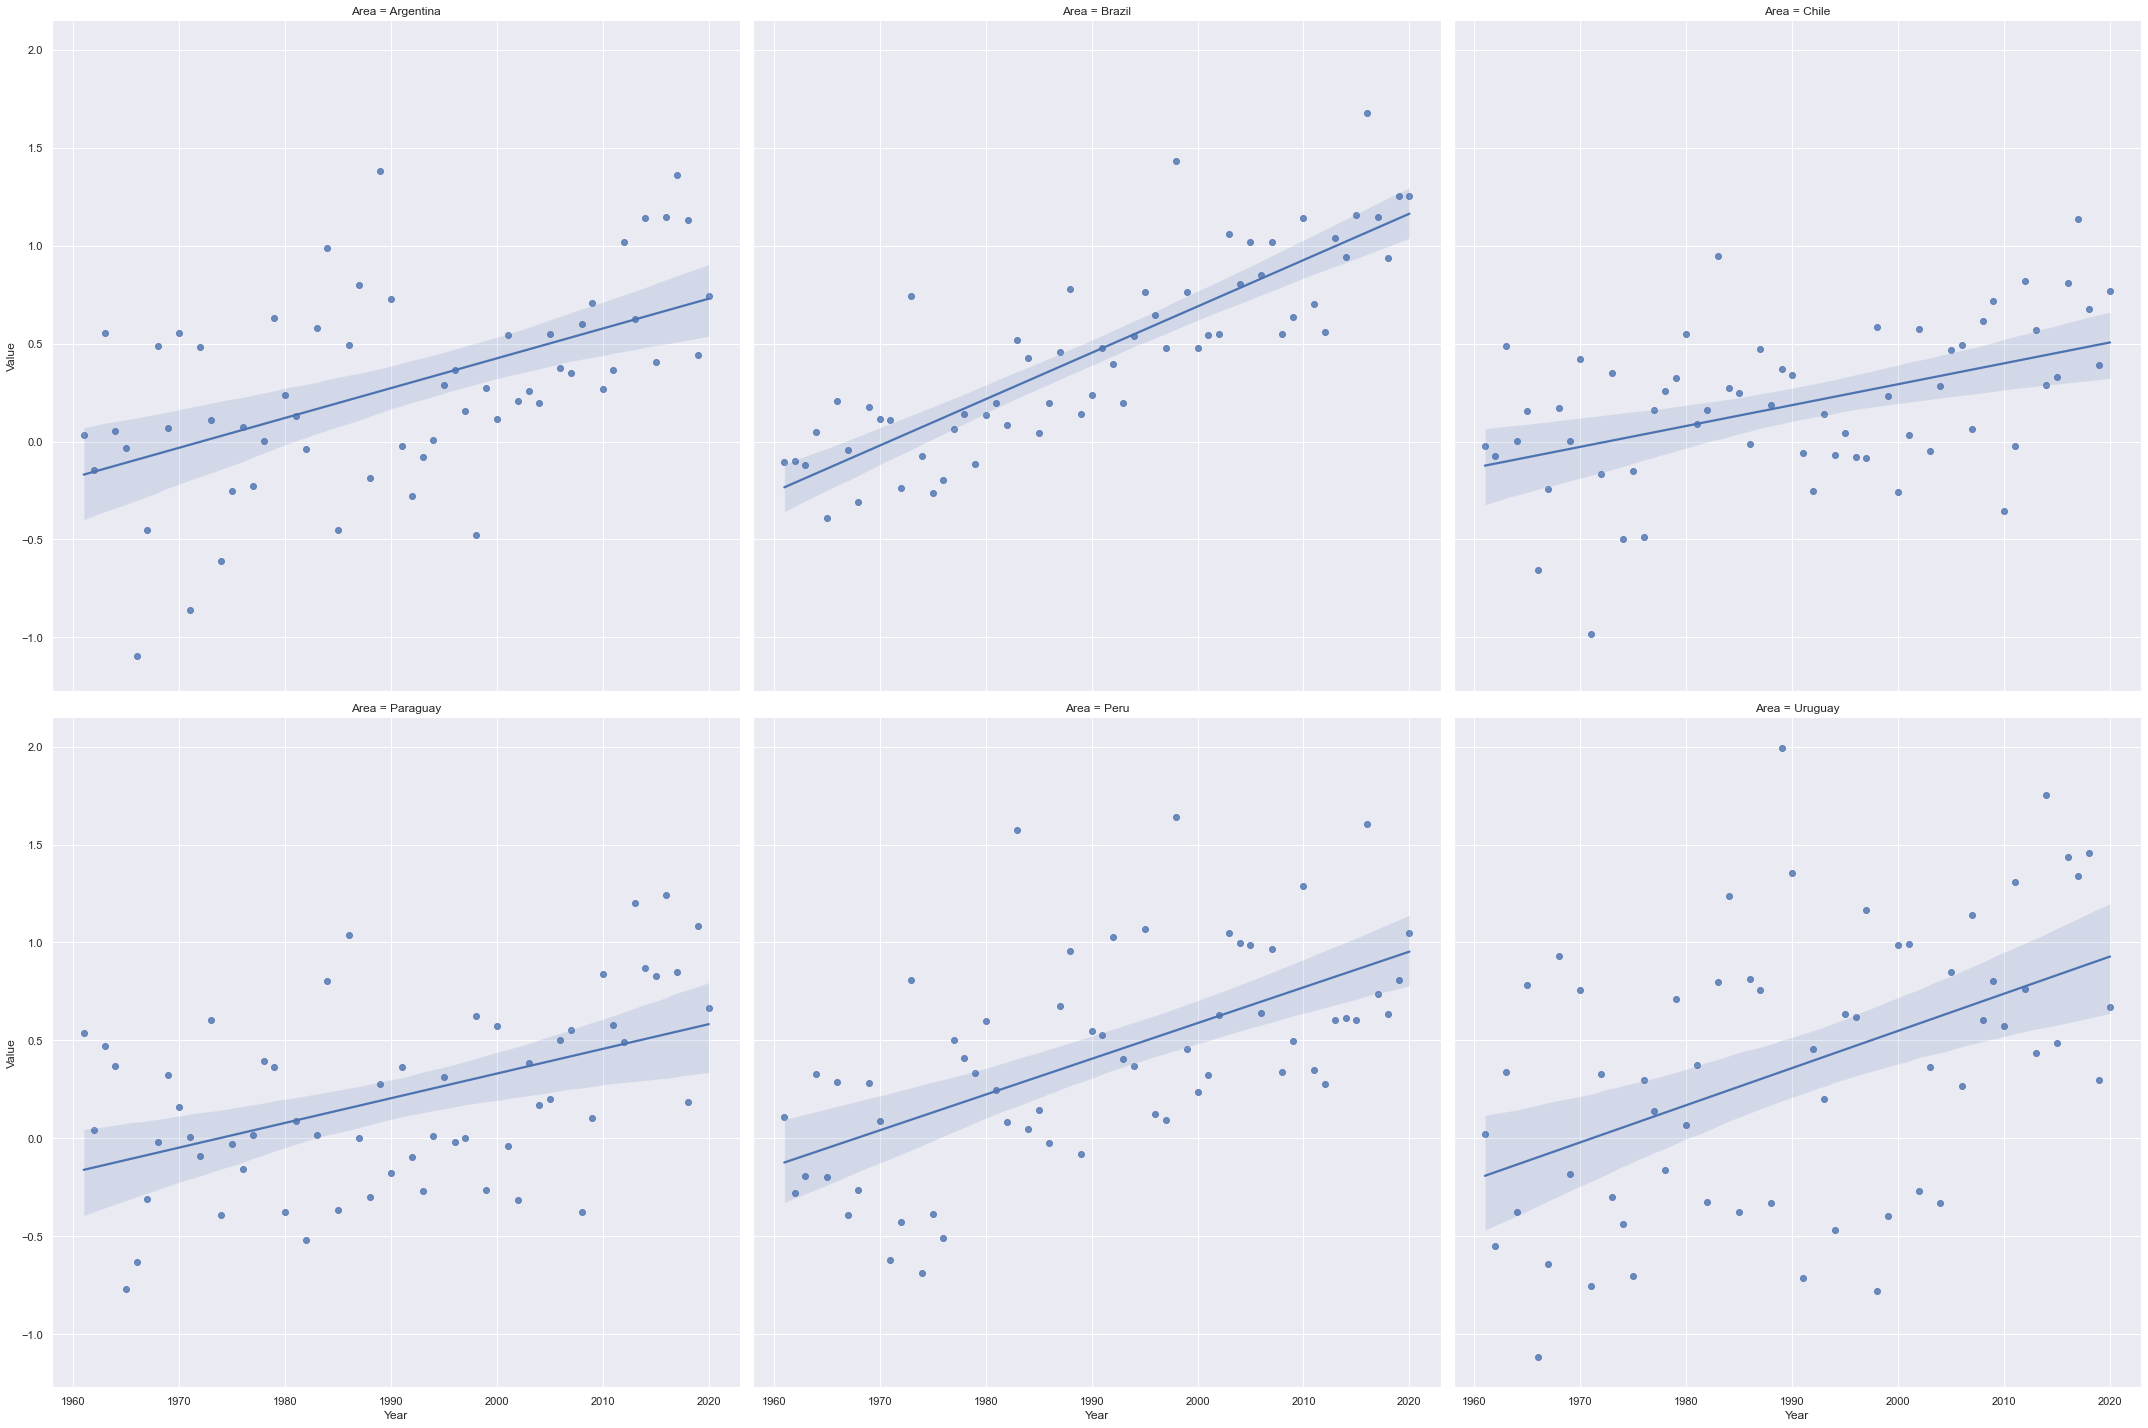

In [60]:
#Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lmplot(data=evolution_south_america_winter, x="Year", y="Value",col="Area",col_wrap=3, height=10)

<Figure size 1584x1008 with 0 Axes>

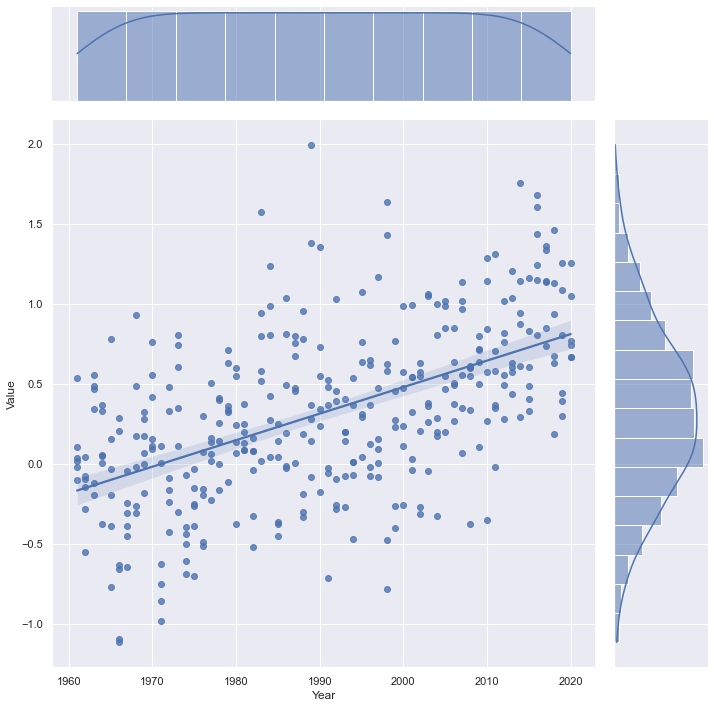

In [61]:
#Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.jointplot(data=evolution_south_america_winter, x="Year", y="Value",height=10,kind="reg")

In [62]:
# Compute percentage per country
totals = evolution.groupby("Area")["Value"].sum().reset_index()
evolution_perc = pd.merge(evolution, totals, on="Area")


# Look into the dataframe

evolution_perc.head()

,Area,Year,Value_x,Value_y
0,China,1961,0.266,33.359
1,China,1962,-0.134,33.359
2,China,1963,0.292,33.359
3,China,1964,-0.020,33.359
4,China,1965,0.081,33.359


In [63]:
evolution_perc["Perc"] = evolution_perc["Value_x"] / evolution_perc["Value_y"]
evolution_perc["Perc"] = evolution_perc["Perc"].apply(lambda x: round(x*100, 2))

In [64]:
evolution_perc.head()

,Area,Year,Value_x,Value_y,Perc
0,China,1961,0.266,33.359,0.80
1,China,1962,-0.134,33.359,-0.40
2,China,1963,0.292,33.359,0.88
3,China,1964,-0.020,33.359,-0.06
4,China,1965,0.081,33.359,0.24


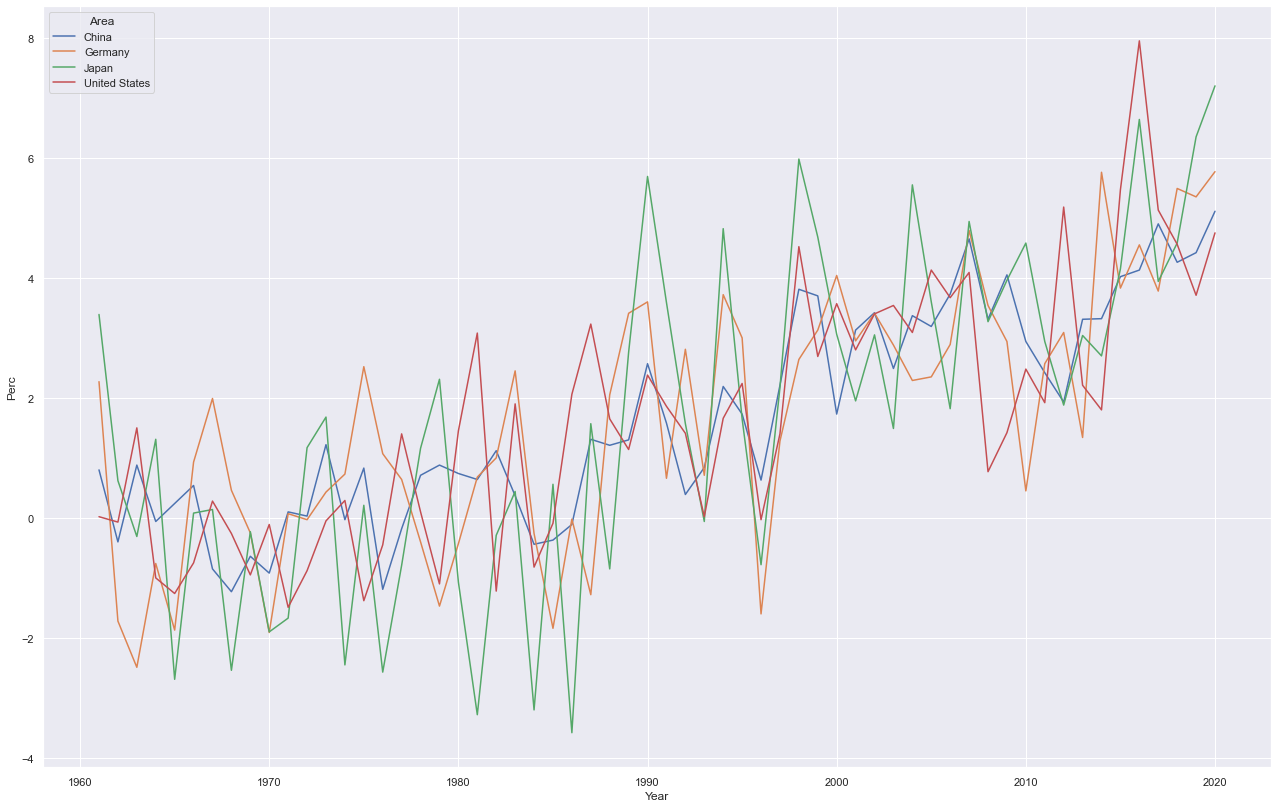

In [65]:
#Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lineplot(data=evolution_perc, x="Year", y="Perc",hue="Area")

<Figure size 1584x1008 with 0 Axes>

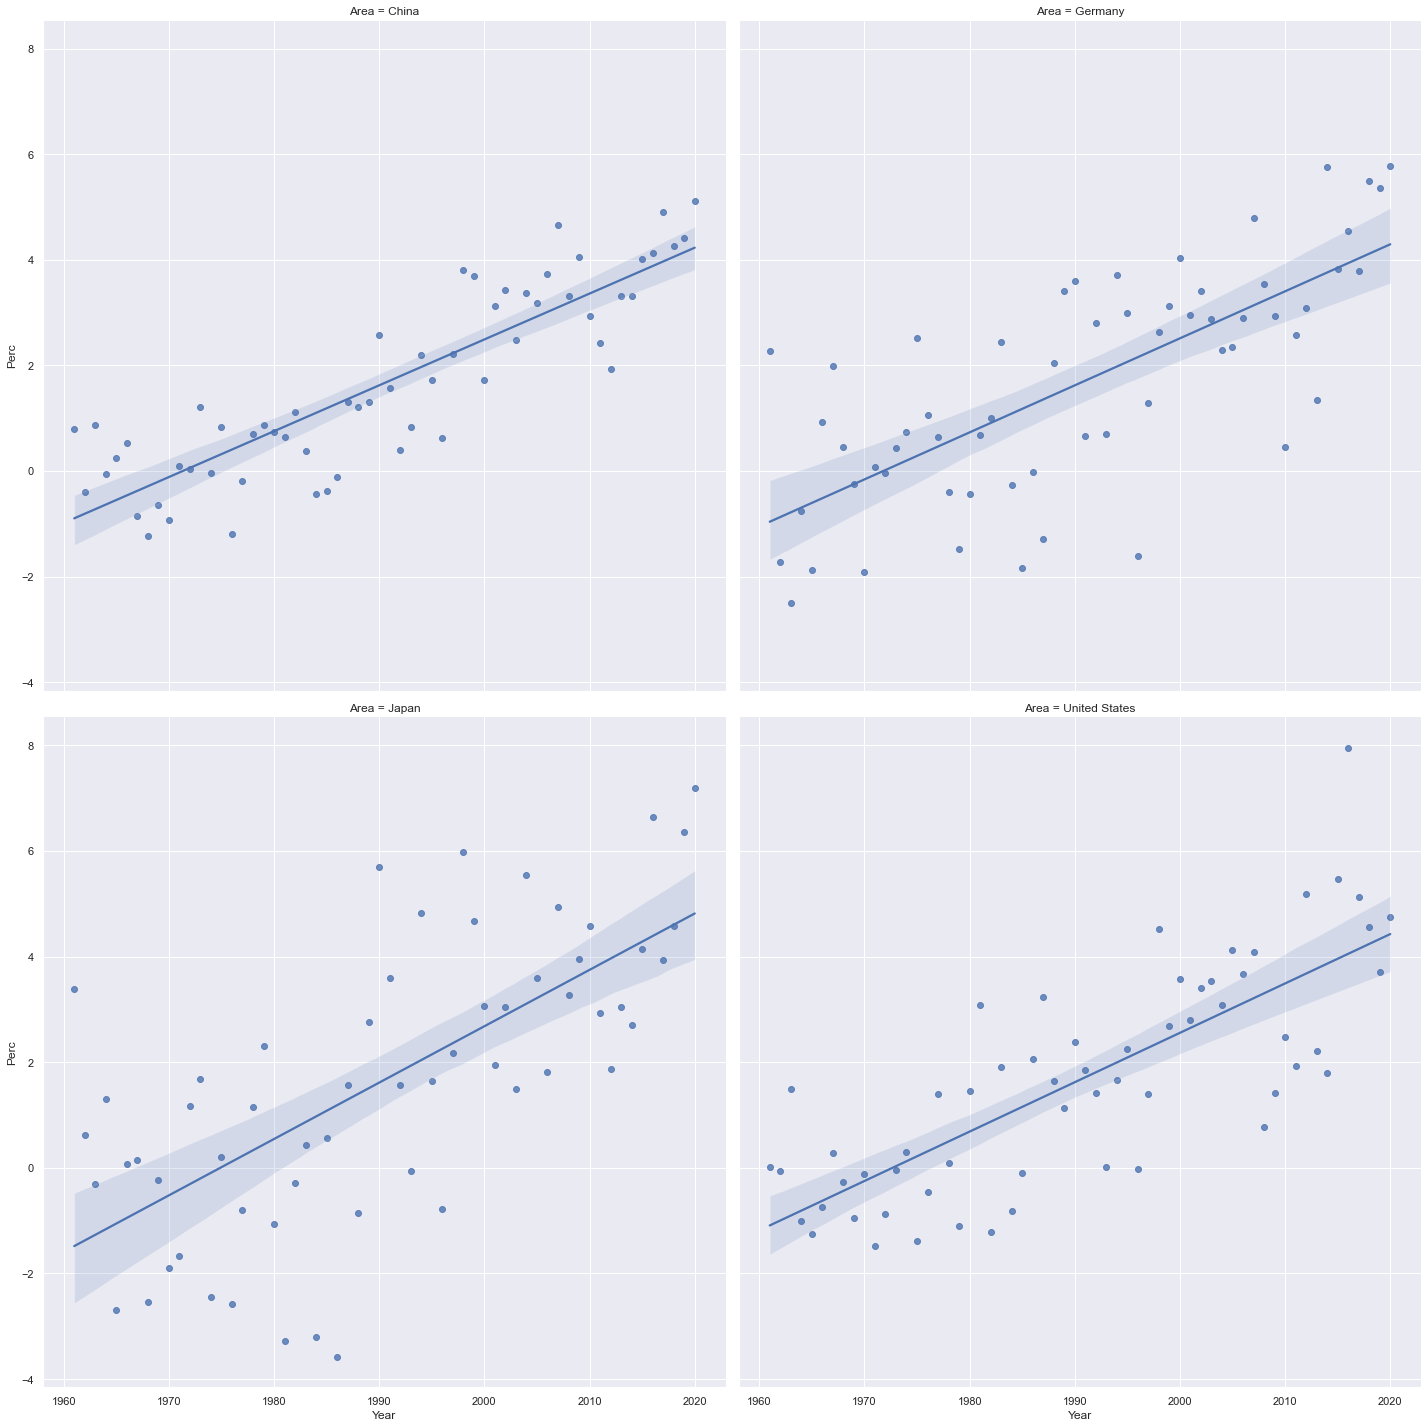

In [66]:
#Set the general figure size
plt.figure(figsize=(22, 14))

# Plot the initial linechart
line = sns.lmplot(data=evolution_perc, x="Year", y="Perc",col="Area",col_wrap=2, height=10)